# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Import datetime for scatterplot titles
from datetime import date

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [8]:
cities[3]

'albany'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
print(weather_api_key)

5a44be61e396e65e9bfe118a02158887


In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pallasovka
Processing Record 2 of Set 1 | aldan
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | sasykoli
Processing Record 8 of Set 1 | keti bandar
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | bandarbeyla
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | neuquen
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | tommot

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pallasovka,50.0500,46.8833,15.19,36,100,5.35,RU,1680430278
1,aldan,58.6031,125.3894,-14.34,92,100,0.75,RU,1680430278
2,rikitea,-23.1203,-134.9692,26.69,82,69,6.26,PF,1680430279
3,albany,42.6001,-73.9662,1.76,72,50,3.13,US,1680430229
4,ponta do sol,32.6667,-17.1000,25.95,67,0,2.54,PT,1680430281


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pallasovka,50.0500,46.8833,15.19,36,100,5.35,RU,1680430278
1,aldan,58.6031,125.3894,-14.34,92,100,0.75,RU,1680430278
2,rikitea,-23.1203,-134.9692,26.69,82,69,6.26,PF,1680430279
3,albany,42.6001,-73.9662,1.76,72,50,3.13,US,1680430229
4,ponta do sol,32.6667,-17.1000,25.95,67,0,2.54,PT,1680430281


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [6]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

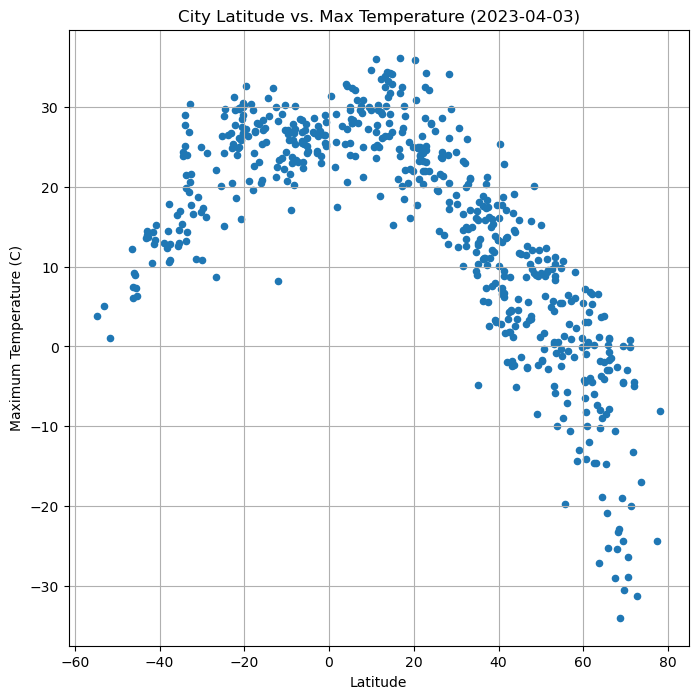

In [7]:
# Build scatter plot for latitude vs. temperature
fig1 = city_data_df.plot.scatter(x="Lat", y="Max Temp", grid=True, figsize=(8,8))

# Incorporate the other graph properties
fig1.set_xlabel("Latitude")
fig1.set_ylabel("Maximum Temperature (C)")
fig1.set_title(f"City Latitude vs. Max Temperature ({str(date.today())})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

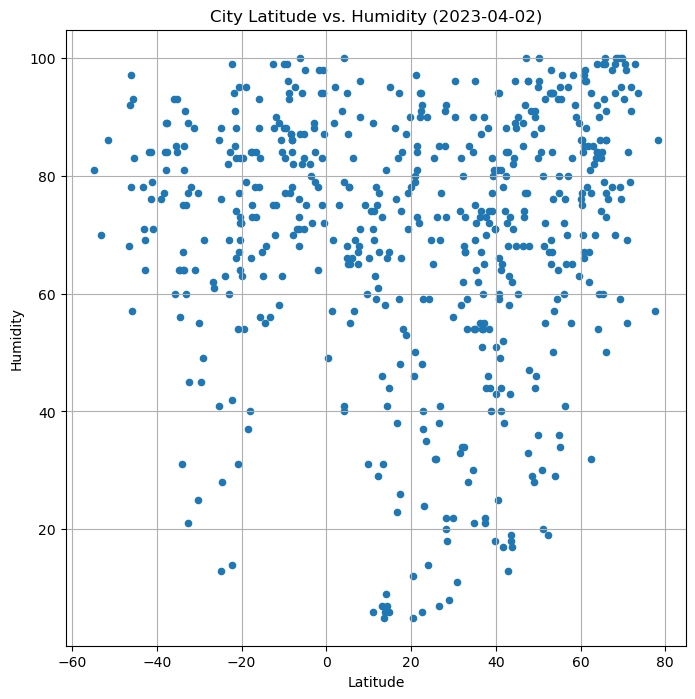

In [41]:
# Build the scatter plots for latitude vs. humidity
fig2 = city_data_df.plot.scatter(x="Lat", y="Humidity", grid=True, figsize=(8,8))

# Incorporate the other graph properties
fig2.set_xlabel("Latitude")
fig2.set_ylabel("Humidity")
fig2.set_title(f"City Latitude vs. Humidity ({str(date.today())})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

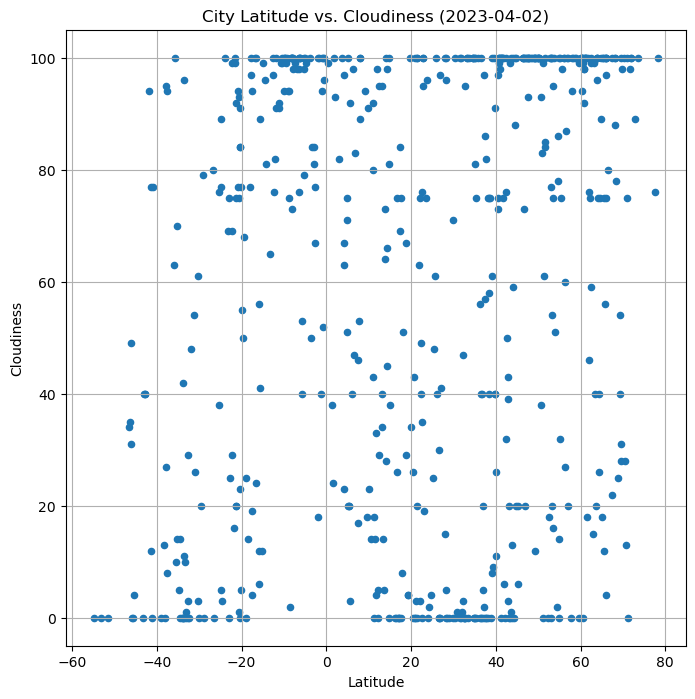

In [43]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = city_data_df.plot.scatter(x="Lat", y="Cloudiness", grid=True, figsize=(8,8))

# Incorporate the other graph properties
fig3.set_xlabel("Latitude")
fig3.set_ylabel("Cloudiness")
fig3.set_title(f"City Latitude vs. Cloudiness ({str(date.today())})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

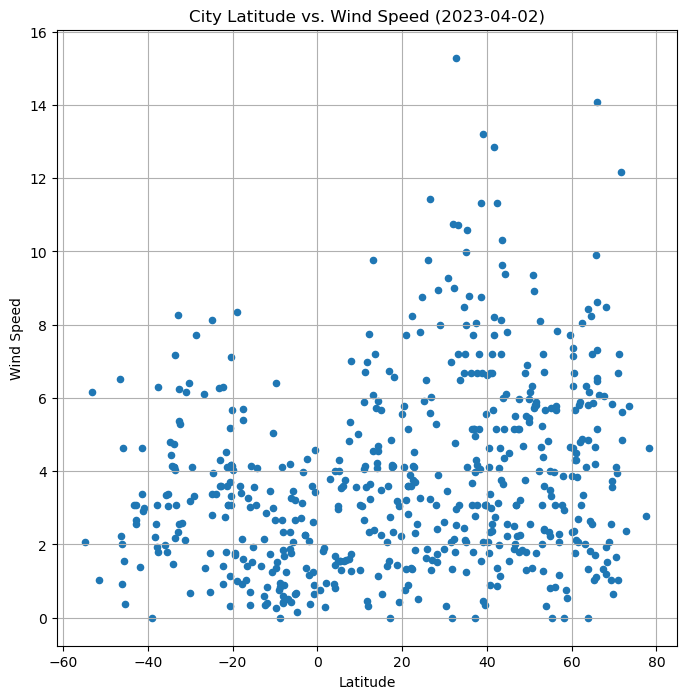

In [44]:
# Build the scatter plots for latitude vs. wind speed
fig4 = city_data_df.plot.scatter(x="Lat", y="Wind Speed", grid=True, figsize=(8,8))

# Incorporate the other graph properties
fig4.set_xlabel("Latitude")
fig4.set_ylabel("Wind Speed")
fig4.set_title(f"City Latitude vs. Wind Speed ({str(date.today())})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [3]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0.3,0.3), xycoords = "figure fraction", fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [4]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pallasovka,50.0500,46.8833,15.19,36,100,5.35,RU,1680430278
1,aldan,58.6031,125.3894,-14.34,92,100,0.75,RU,1680430278
3,albany,42.6001,-73.9662,1.76,72,50,3.13,US,1680430229
4,ponta do sol,32.6667,-17.1000,25.95,67,0,2.54,PT,1680430281
5,sasykoli,47.5515,46.9968,15.67,33,93,5.98,RU,1680430282


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,26.69,82,69,6.26,PF,1680430279
8,hithadhoo,-0.6000,73.0833,28.13,72,96,4.59,MV,1680430284
9,puerto ayora,-0.7393,-90.3518,25.31,98,52,0.89,EC,1680430285
13,neuquen,-38.9516,-68.0591,12.94,76,0,0.00,AR,1680430291
14,tuatapere,-46.1333,167.6833,9.24,78,31,2.02,NZ,1680430204


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7696305862925984


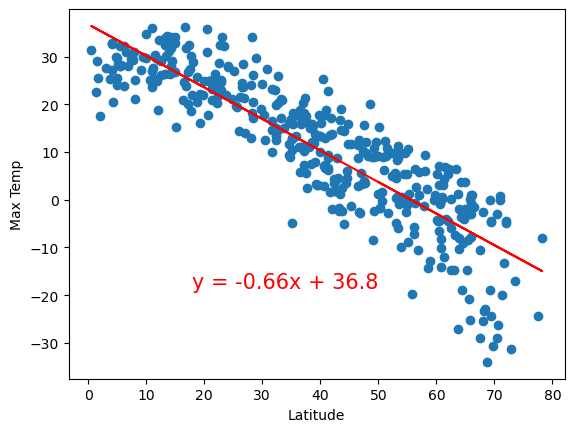

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
lin_regress(x_values, y_values)

The r-squared is: 0.4804011910952394


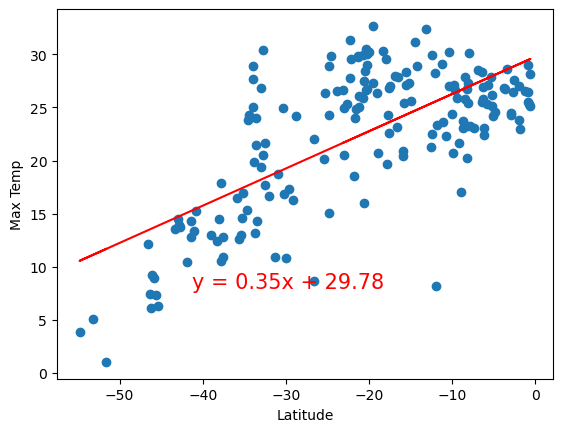

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
lin_regress(x_values, y_values)

**Discussion about the linear relationship:** 
- Northern hemisphere temperatures are negatively correlated with latitude. Temperature is lowest at high northern latitudes (near the north pole) and highest at low northern latitudes (near the equator). The r-squared value for this relationship is 0.77 indicating a strong correlation.
- Conversely, southern hemisphere temperatures are positively correlated with latitude. Temperature is lowest at low southern latitudes (near the south pole) and highest at high southern latitudes (near the equator). The r-squared value for this relationship is 0.48 indicating a weaker correlation than in the northern hemisphere. This is most likely due to the southern hemisphere having fewer data points in this data set (fewer cities).
- The main reason the poles are significantly colder than the equator is because, due to the curvature of the earth, the incident angle of sunlight in the poles is very low, resulting in enery from the sun being spread over a larger surface area.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08286519135624035


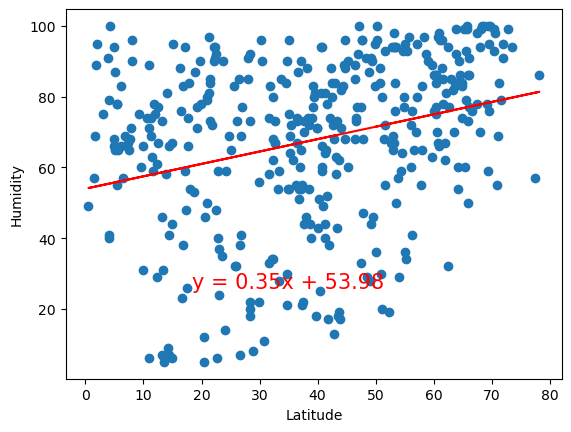

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
lin_regress(x_values, y_values)

The r-squared is: 0.036881541173454546


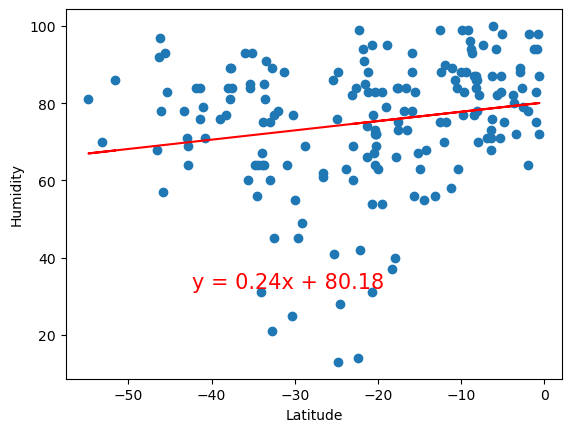

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
lin_regress(x_values, y_values)

**Discussion about the linear relationship:** 
- Absolute humidity is the total amount of water vapour in a given wolume of air. Absolute humidity varies with air temperature and pressure.
- Relative humidity is the ratio of the mass of water vapour in the air to the maximum mass of water vapour the air could hold given it's temperature and pressure. Warm air can hold more water vapour, while colder air holds less, so we would expect both hemispheres to display a trend towards high humidity at the equator. This is weakly observed in the southern hemisphere but the reverse is seen in the northern hemisphere, although in both cases the correlation is very weak.
- Despite the physical ability of hot v cold air to contain a greater mass of water vapour, several geographical and weather related factors may obscure this trend at the global level. These include atmospheric mixing due to wind, seasonal and daily temperature variation around the globe, unique climate zones generated by specific geographical features such as deserts and mountains, and proximity to large bodies of water.
(Sources: https://en.wikipedia.org/wiki/Humidity, https://chat.openai.com/chat)


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0637369690855126


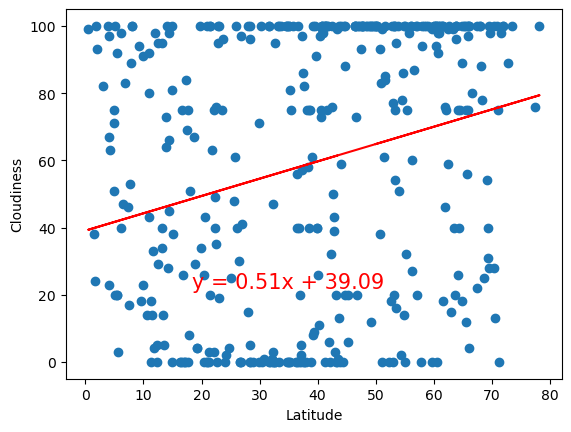

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
lin_regress(x_values, y_values)

The r-squared is: 0.3500584402892599


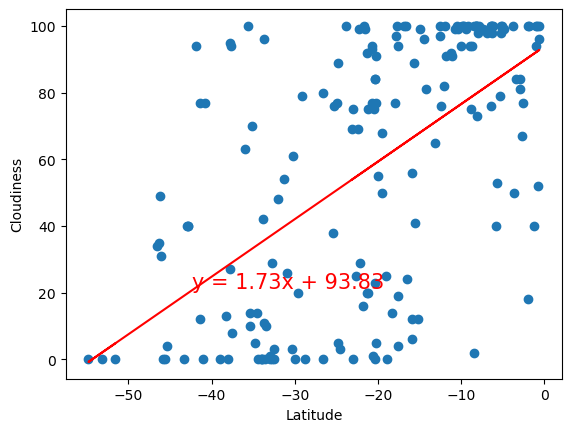

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
lin_regress(x_values, y_values)

**Discussion about the linear relationship:** 
- Cloudiness refers to the fraction of the sky obscured by clouds.
- There is a latitudinal variation in the cloud cover, such that around 20°N there are regions with 0.10 less cloudiness than the global mean. Almost the same variation (0.15 instead of 0.10) is found 20°S. This is because of the absence of equatorial effects and strong winds reducing cloud formation.
- Nontheless, similar to humidity, our dataset does not demonstrate a strong correlation between cloudiness and latitude. This can be attributed to the complex interplay of geographical and weather related factors that influence cloud cover levels around the world.
(Sources: https://en.wikipedia.org/wiki/Humidity, https://chat.openai.com/chat)

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.016426373041260316


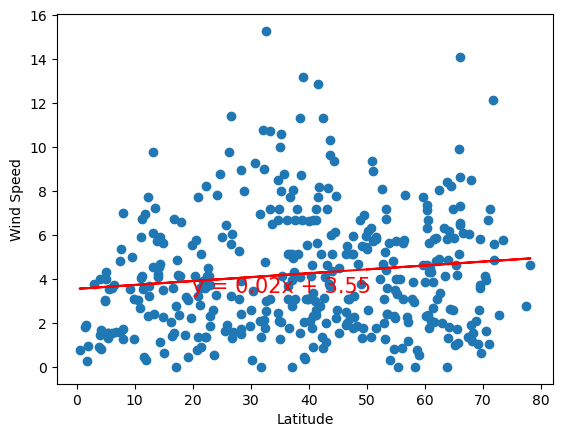

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
lin_regress(x_values, y_values)

The r-squared is: 0.06679507946948372


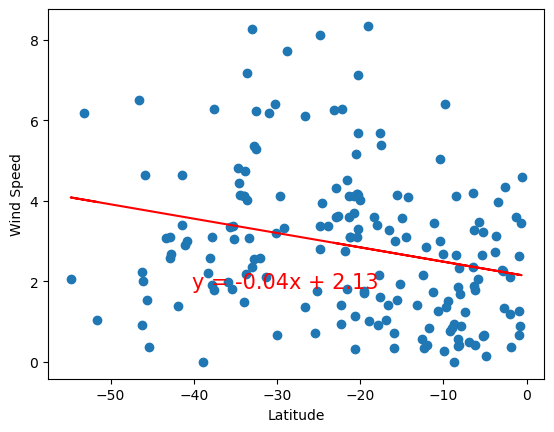

In [6]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
lin_regress(x_values, y_values)

**Discussion about the linear relationship:** 
- Wind is the movement of air from high to low pressure regions, usually due to changes in temperature.
- As observed for humidity and cloudiness, there is no significant correlation between wind speed and latitude in this data. This can be attributed to the complex interplay of geographical and weather related factors that influence wind patterns and speed around the world. 
(Sources: https://en.wikipedia.org/wiki/Humidity, https://chat.openai.com/chat)